In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [24]:
df=pd.read_csv('Algerian_cleaned.csv')

In [25]:
df.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [26]:
df.drop(['month','day','year'],axis=1,inplace=True)

In [27]:
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
Classes            1
not fire           1
not fire           1
Name: count, dtype: int64

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
#encoding
df['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [8]:
df.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [30]:
#independent and dependent
X=df.drop('FWI',axis=1)
y=df['FWI']

In [31]:
X.head()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [32]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [33]:
#traintestsplit
from sklearn.model_selection import train_test_split


In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [35]:
X_train.shape

(183, 12)

In [36]:
X_train.corr()

,Unnamed: 0,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Unnamed: 0,1.000000,0.163925,-0.321109,-0.206302,-0.052872,0.228371,0.261809,0.061335,0.288743,0.184188,0.192990,0.868101
Temperature,0.163925,1.000000,-0.367786,0.017876,-0.344505,0.702034,0.489970,0.383243,0.607763,0.465158,0.397780,0.172104
RH,-0.321109,-0.367786,1.000000,0.321064,0.239433,-0.640490,-0.398049,-0.219443,-0.698857,-0.345916,-0.442116,-0.402065
Ws,-0.206302,0.017876,0.321064,1.000000,0.223349,-0.161663,-0.001829,0.082730,0.020274,0.034020,-0.095399,-0.245197
Rain,-0.052872,-0.344505,0.239433,0.223349,1.000000,-0.564873,-0.290046,-0.300285,-0.354479,-0.301527,-0.380854,-0.078864
FFMC,0.228371,0.702034,-0.640490,-0.161663,-0.564873,1.000000,0.597020,0.503788,0.745032,0.587550,0.778048,0.248180
DMC,0.261809,0.489970,-0.398049,-0.001829,-0.290046,0.597020,1.000000,0.877448,0.654349,0.981948,0.570181,0.204224
DC,0.061335,0.383243,-0.219443,0.082730,-0.300285,0.503788,0.877448,1.000000,0.498627,0.941407,0.486240,-0.072253
ISI,0.288743,0.607763,-0.698857,0.020274,-0.354479,0.745032,0.654349,0.498627,1.000000,0.626298,0.738717,0.279701
BUI,0.184188,0.465158,-0.345916,0.034020,-0.301527,0.587550,0.981948,0.941407,0.626298,1.000000,0.571518,0.099550


<Axes: >

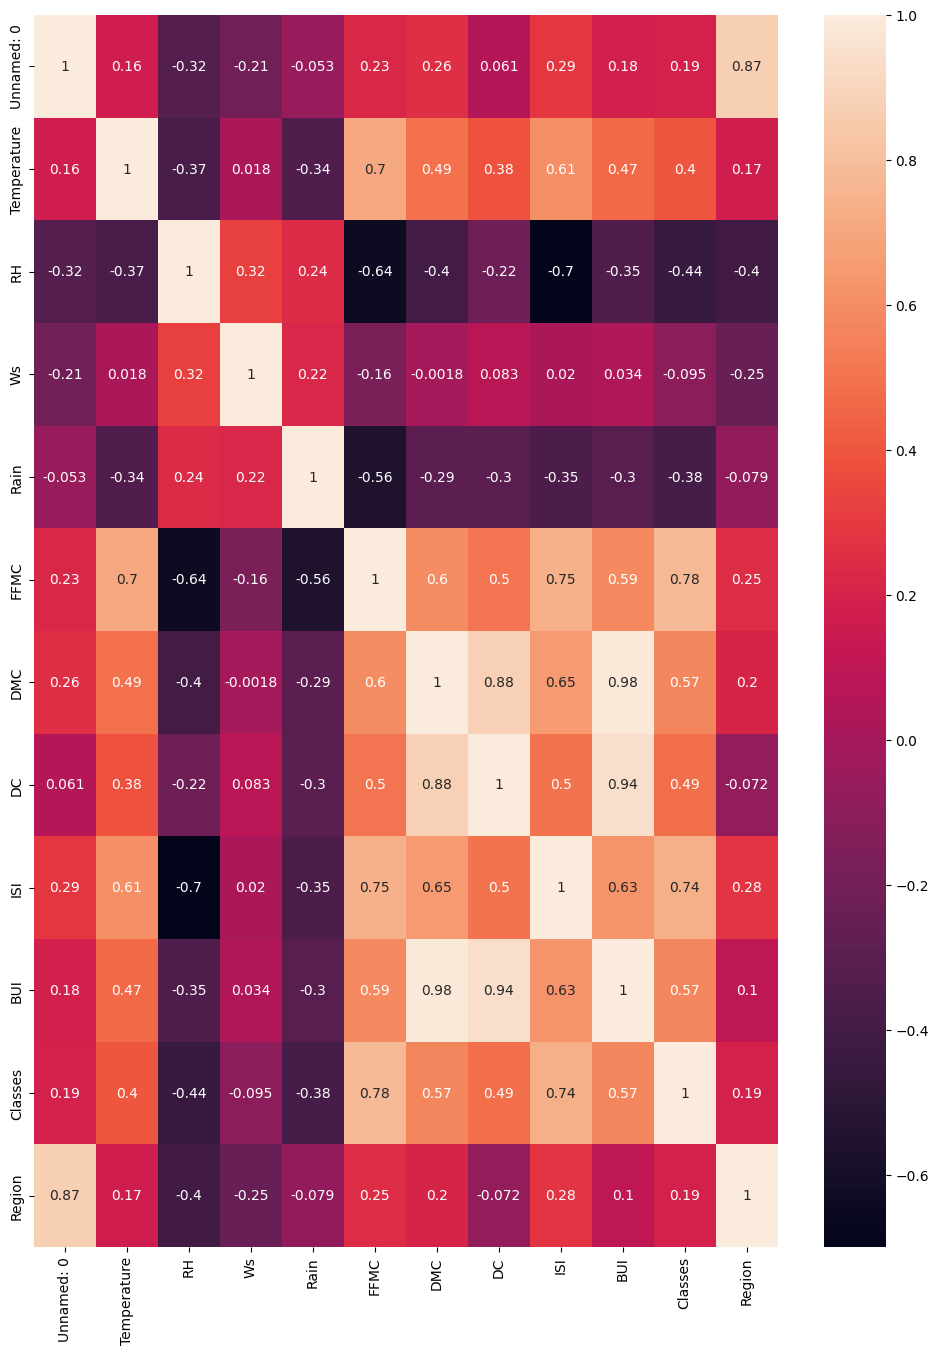

In [37]:
#multi colinearity
plt.figure(figsize=(12,16))
corr=X_train.corr()
sns.heatmap(corr,annot=True)

In [38]:
def coorelate(dataset, threshold):
    col_corr = set()
    corr_mat = dataset.corr()
    for i in range(len(corr_mat)):
        for j in range(i):
            if abs(corr_mat.iloc[i, j]) > threshold:
                colname = corr_mat.columns[i]
                col_corr.add(colname)
    return col_corr

# Example usage
corrt=coorelate(X_train, 0.85)

In [39]:
X_train.drop(corrt,axis=1,inplace=True)
X_test.drop(corrt,axis=1,inplace=True)
X_train.shape, X_test.shape

((183, 9), (61, 9))

In [41]:
X_test.drop(corrt,axis=1,inplace=True)


KeyError: "['DC', 'BUI', 'Region'] not found in axis"

In [42]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


<Axes: >

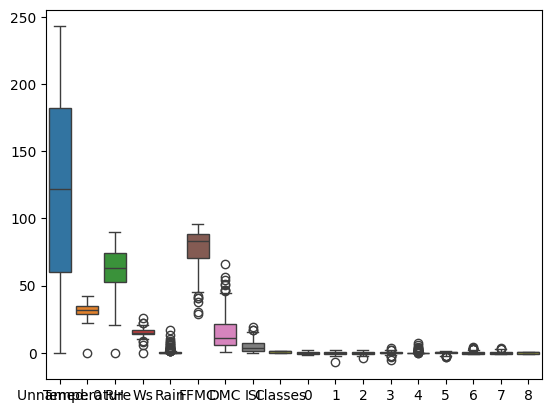

In [43]:
#Boxplot
sns.boxplot(X_train)
sns.boxplot(X_train_scaled)

In [44]:
import numpy as np

mask = ~np.isnan(X_train_scaled).any(axis=1)
X_train_clean = X_train_scaled[mask]
y_train_clean = y_train[mask]

mask_test = ~np.isnan(X_test_scaled).any(axis=1)
X_test_clean = X_test_scaled[mask_test]
y_test_clean = y_test[mask_test]



In [45]:
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso, Ridge,LinearRegression
model=LinearRegression()
imputer = SimpleImputer(strategy='mean')  # Try 'median' or 'most_frequent' too
X_train_imputed = imputer.fit_transform(X_train_scaled)
X_test_imputed = imputer.transform(X_test_scaled)



In [46]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge,LinearRegression
model=LinearRegression()

model.fit(X_train_clean, y_train_clean)
y_pred=model.predict(X_test_clean)
mse=mean_squared_error(y_test_clean, y_pred)
print("Mean Squared Error:", mse)
r2= r2_score(y_test_clean, y_pred)
print("R^2 Score:", r2)
adjusted_r2 = 1 - (1 - r2) * (len(y_test_clean) - 1) / (len(y_test_clean) - X_test_clean.shape[1] - 1)
print("Adjusted R^2 Score:", adjusted_r2)

Mean Squared Error: 0.5799781527643768
R^2 Score: 0.9900427050304452
Adjusted R^2 Score: 0.9882855353299356


In [47]:
lasso= Lasso(alpha=0.1)
lasso.fit(X_train_clean, y_train_clean)

Lasso(alpha=0.1)

In [48]:
y_predict_lasso=lasso.predict(X_test_clean)

In [49]:
mse_lasso=mean_squared_error(y_test_clean,y_predict_lasso)
r2_lasso = r2_score(y_test_clean, y_predict_lasso)
print("Lasso Mean Squared Error:", mse_lasso)   
print("Lasso R^2 Score:", r2_lasso)
adjusted_r2 = 1 - (1 - r2_lasso) * (len(y_test_clean) - 1) / (len(y_test_clean) - X_test_clean.shape[1] - 1)
print("Adjusted R^2 Score:", adjusted_r2)

Lasso Mean Squared Error: 0.8395971304195783
Lasso R^2 Score: 0.9855854634466276
Adjusted R^2 Score: 0.9830417217019147


In [50]:
ridge=Ridge(alpha=0.1)
ridge.fit(X_train_clean,y_train_clean)
y_predict_ridge=ridge.predict(X_test_clean)
mse_ridge=mean_squared_error(y_test_clean,y_predict_ridge)
r2_ridge = r2_score(y_test_clean, y_predict_ridge)
print("Ridge Mean Squared Error:", mse_ridge)   
print("Ridge R^2 Score:", r2_ridge)
print("Rmse",np.sqrt(mse_ridge))

Ridge Mean Squared Error: 0.5828395096535264
Ridge R^2 Score: 0.9899935801204419
Rmse 0.7634392638930266


In [51]:
adjusted_r2 = 1 - (1 - r2_ridge) * (len(y_test_clean) - 1) / (len(y_test_clean) - X_test_clean.shape[1] - 1)
print("Adjusted R^2 Score:", adjusted_r2)

Adjusted R^2 Score: 0.9882277413181669


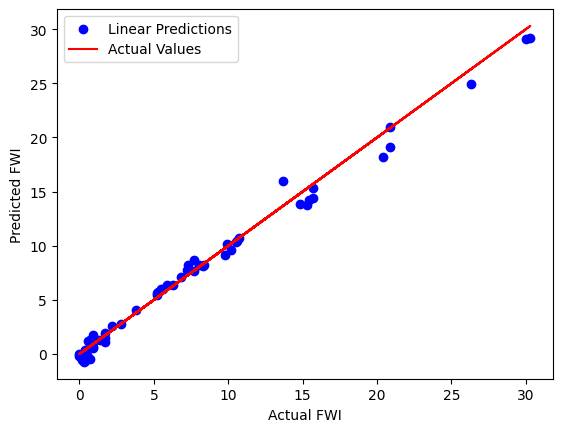

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test_clean, y_pred, color='blue', label='Linear Predictions')
plt.plot(y_test_clean, y_test_clean, color='red', label='Actual Values' )
plt.xlabel('Actual FWI')
plt.ylabel('Predicted FWI')     
plt.legend()
plt.show()

In [53]:
#crossvalidate with lasso
from sklearn.linear_model import LassoCV

lassocv=LassoCV(cv=5)
lassocv.fit(X_train_clean,y_train_clean)
y_pred_lassocv=lassocv.predict(X_test_clean)    
mse_lassocv=mean_squared_error(y_test_clean,y_pred_lassocv)
print("LassoCV Mean Squared Error:", mse_lassocv)
r2_lassocv = r2_score(y_test_clean, y_pred_lassocv)
print("LassoCV R^2 Score:", r2_lassocv)


LassoCV Mean Squared Error: 0.6061564787932373
LassoCV R^2 Score: 0.9895932651457942


In [54]:
from sklearn.linear_model import ElasticNet

In [55]:
elastic=ElasticNet()
elastic.fit(X_train_clean,y_train_clean)

y_predict_elastic=elastic.predict(X_test_clean)
mse_elastic=mean_squared_error(y_test_clean,y_predict_elastic)
print("ElasticNet Mean Squared Error:", mse_elastic)
r2_elastic=r2_score(y_test_clean, y_predict_elastic)
print("ElasticNet R^2 Score:", r2_elastic)


ElasticNet Mean Squared Error: 6.857070816030294
ElasticNet R^2 Score: 0.8822750884375499


In [56]:
scaler

StandardScaler()

In [57]:
ridge

Ridge(alpha=0.1)

In [58]:
import pickle
pickle.dump(scaler, open('scaler.pkl', 'wb'))  
pickle.dump(ridge,open('ridge.pkl','wb')) 